## Einführung Pandas

### Was ist Pandas?

**Pandas** (Python Data Analysis Library) ist eine Python Bibiliothek zur Analyse von Daten.

Wir konzentrieren uns hier auf die Klasse *DataFrame*.

### Was ist ein DataFrame?

Ein *DataFrame* ist ein Objekt das Daten enthält. Es ist vergleichbar mit einer Excel Tabelle und kann aus einer *.csv* Datei (comma separated values, kommaseparierte Werte) oder einem Python dictionary erstellt werden.

Ein Pandas *DataFrame* kann verschiedene Typen von Werten enthalten (bswp. String, Integer, Float). In der nächsten Zelle wird ein *DataFrame* aus einem Python dictionary erstellt.


In [100]:
import pandas as pd

# Daten als dictionary, alle Einträge müssen die gleiche Länge haben
daten = {
    'Land': ['USA', 'Frankreich', 'Deutschland', 'Spanien', 'Australien'],
    'Hauptstadt': ['Washington', 'Paris', 'Berlin', 'Madrid', 'Canberra'],
    'Einwohner': [325400000, 65000000, 83100000, 46600000, 24500000]
}

# Erstellen eines DataFrame
df = pd.DataFrame(daten)
df

,Land,Hauptstadt,Einwohner
0,USA,Washington,325400000
1,Frankreich,Paris,65000000
2,Deutschland,Berlin,83100000
3,Spanien,Madrid,46600000
4,Australien,Canberra,24500000


### Arbeiten mit DataFrames

Der oben erstellte *DataFrame* kombiniert die Daten und bennent Spalten bzw. Zeilen. 

#### 1. Zugriff auf bestimmte Spalten

Um die Einträge einer Spalte zu erhalten kann man wie folgt vorgehen:

In [101]:
# Zugriff auf Spalte Einwohner als Index des DataFrames
print(df['Einwohner'])
print()
# Zugriff auf die Spalte Einwohner mit der Punkt Operation
print(df.Einwohner)
print()
# Zugriff auf die Spalten Einwohner und Land
print(df[['Einwohner', 'Land']])

0    325400000
1     65000000
2     83100000
3     46600000
4     24500000
Name: Einwohner, dtype: int64

0    325400000
1     65000000
2     83100000
3     46600000
4     24500000
Name: Einwohner, dtype: int64

   Einwohner         Land
0  325400000          USA
1   65000000   Frankreich
2   83100000  Deutschland
3   46600000      Spanien
4   24500000   Australien


#### 2. Auswahl von Daten mit Bedingungen

Wenn wir uns die Tabelle anschauen können wir uns die Frage stellen welche Länder mehr als 80 Mio Einwohner haben.

In [102]:
df.loc[df.Einwohner > 80000000]

,Land,Hauptstadt,Einwohner
0,USA,Washington,325400000
2,Deutschland,Berlin,83100000


Um nun das Land zu erhalten können wir wiederum den Spaltenindex benutzen

In [49]:
df[df.Einwohner > 80000000].Land

0            USA
2    Deutschland
Name: Land, dtype: object

#### 3. Hinzufügen eines neuen Eintrags

Wir können neue Einträge zu unserem *DataFrame* hinzufügen

In [50]:
# Hinzufügen einer Zeile
luxemburg = {
    'Land': 'Luxemburg',
    'Hauptstadt': 'Luxemburg (Stadt)',
    'Einwohner': 600000
}

df = df.append(luxemburg, ignore_index=True)
df

,Land,Hauptstadt,Einwohner
0,USA,Washington,325400000
1,Frankreich,Paris,65000000
2,Deutschland,Berlin,83100000
3,Spanien,Madrid,46600000
4,Australien,Canberra,24500000
5,Luxemburg,Luxemburg (Stadt),600000


In [51]:
# Hinzufügen mehrerer Zeilen
neue_laender = {
    'Land': ['Bolivien', 'Chile'],
    'Hauptstadt': ['Sucre', 'Santiago de Chile'],
    'Einwohner': [11100000, 18400000]
}
# Erstellen eines neuen DataFrames
df2 = pd.DataFrame(neue_laender)
# Hinzufügen des neuen DataFrames
df = df.append(df2, ignore_index=True)
df

,Land,Hauptstadt,Einwohner
0,USA,Washington,325400000
1,Frankreich,Paris,65000000
2,Deutschland,Berlin,83100000
3,Spanien,Madrid,46600000
4,Australien,Canberra,24500000
5,Luxemburg,Luxemburg (Stadt),600000
6,Bolivien,Sucre,11100000
7,Chile,Santiago de Chile,18400000


#### 4. Hinzufügen einer neuen Spalte

Wir können neue Spalten zu einem bestehenden *DataFrame* hinzufügen

In [52]:
# Fläche der Länder in km**2, selbe Reihenfolge wie Einträge im DataFrame
flaeche = [9826675, 551500, 357121, 505370, 7741220, 2586, 1098581, 756102]

# Hinzufügen der Spalte
df['Flaeche'] = flaeche

df

,Land,Hauptstadt,Einwohner,Flaeche
0,USA,Washington,325400000,9826675
1,Frankreich,Paris,65000000,551500
2,Deutschland,Berlin,83100000,357121
3,Spanien,Madrid,46600000,505370
4,Australien,Canberra,24500000,7741220
5,Luxemburg,Luxemburg (Stadt),600000,2586
6,Bolivien,Sucre,11100000,1098581
7,Chile,Santiago de Chile,18400000,756102


#### 5. Vereinigung (JOIN) zweier DataFrames

Wir können zwei *DataFrames* ähnlich zum SQL Join verbinden. Dafür erstellen wir uns zuerst zwei *DataFrames* die eine Spalte gemeinsam haben.

In [58]:
# Länder mit Hauptstädten und Einwohnerzahl
daten1 = {
    'Land': ['USA', 'Frankreich', 'Deutschland', 'Spanien', 'Australien', 'Luxemburg', 'Bolivien', 'Chile'],
    'Hauptstadt': ['Washington', 'Paris', 'Berlin', 'Madrid', 'Canberra', 'Luxemburg (Stadt)', 'Sucre', 'Santiago de Chile'],
    'Einwohner': [325400000, 65000000, 83100000, 46600000, 24500000, 600000, 11100000, 18400000]
}

# Länder mit Fläche, Einträge in anderer Reihenfolge
daten2 = {
    'Land': ['Chile', 'Bolivien', 'Luxemburg', 'Australien', 'Spanien', 'Deutschland', 'Frankreich', 'USA'],
    'Flaeche': [756102, 1098581, 2586, 7741220, 505370, 357121, 551500, 9826675]
}
df1 = pd.DataFrame(daten1)
df2 = pd.DataFrame(daten2)

Wir wissen, dass beide *DataFrames* jeweils einen Eintrag für das Land haben. Daher können wir einen Join auf dem Land ausführen.

In [67]:
df3 = df1.join(df2.set_index('Land'), on='Land')

df3

,Land,Hauptstadt,Einwohner,Flaeche
0,USA,Washington,325400000,9826675
1,Frankreich,Paris,65000000,551500
2,Deutschland,Berlin,83100000,357121
3,Spanien,Madrid,46600000,505370
4,Australien,Canberra,24500000,7741220
5,Luxemburg,Luxemburg (Stadt),600000,2586
6,Bolivien,Sucre,11100000,1098581
7,Chile,Santiago de Chile,18400000,756102


#### 6. Rechenoperationen auf Spalten

Angenommen wir möchten dem *DataFrame* eine neue Spalte mit der Anzahl der Einwohner pro $km^2$ hinzufügen.

Dann können wir folgendes tun:

In [68]:
df3['Einwohner pro Flaeche'] = df3.Einwohner / df3.Flaeche
df3

,Land,Hauptstadt,Einwohner,Flaeche,Einwohner pro Flaeche
0,USA,Washington,325400000,9826675,33.113947
1,Frankreich,Paris,65000000,551500,117.860381
2,Deutschland,Berlin,83100000,357121,232.694241
3,Spanien,Madrid,46600000,505370,92.209668
4,Australien,Canberra,24500000,7741220,3.164876
5,Luxemburg,Luxemburg (Stadt),600000,2586,232.018561
6,Bolivien,Sucre,11100000,1098581,10.103943
7,Chile,Santiago de Chile,18400000,756102,24.335341


#### 7. Umbenennen von Spalten

Es kann vorkommen, dass wir einen *DataFrame* aus einer Datei (bswp. *.csv*) erstellen und uns die Namen nicht gefallen. Angenommen wir möchten den Eintrag ```Einwohner pro Flaeche``` in ```Einwohner pro Quadratkilometer``` umbenennen. Dann können wir den Namen einer oder mehrerer Spalten wie folgt ändern:

In [72]:
# Das dictionary columns gibt an welche alten Namen wir in welche neuen Namen umbennenen wollen
df3 = df3.rename(columns={'Einwohner pro Flaeche': 'Einwohner pro Quadratkilomenter'})

#### 8. Sortieren des DataFrames

Wir können einen *DataFrame* nach einer Spalte oder mehrerer Spalten sortieren.

In [88]:
# Sortiere die Daten nach Einwohner und dann nach Land.
# Land hat hier keinen Effekt da es keine Länder mit gleicher Einwohnerzahl gibt.
# Ascending gibt an ob aufsteigend (True) oder absteigend (False) sortiert werden soll.
df3.sort_values(by=['Einwohner', 'Land'], ascending=False)

,Land,Hauptstadt,Einwohner,Flaeche,Einwohner pro Quadratkilomenter
0,USA,Washington,325400000,9826675,33.113947
2,Deutschland,Berlin,83100000,357121,232.694241
1,Frankreich,Paris,65000000,551500,117.860381
3,Spanien,Madrid,46600000,505370,92.209668
4,Australien,Canberra,24500000,7741220,3.164876
7,Chile,Santiago de Chile,18400000,756102,24.335341
6,Bolivien,Sucre,11100000,1098581,10.103943
5,Luxemburg,Luxemburg (Stadt),600000,2586,232.018561


### Visualisierung von DataFrames

Ein weiterer Vorteil eines *DataFrame* ist die Möglichkeit Daten einfach zu visualisieren.

Nachfolgend ein paar Beispiele

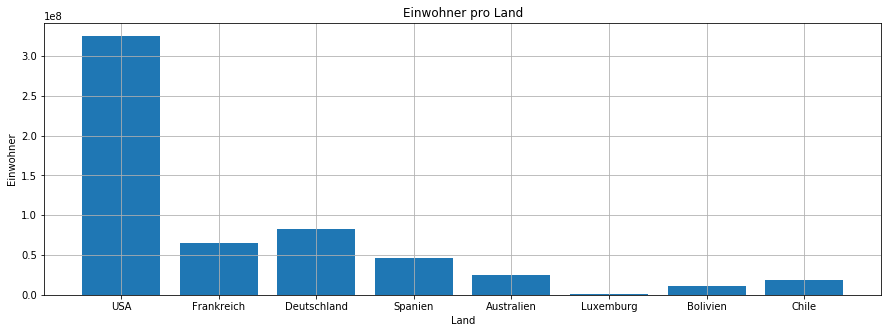

In [85]:
import matplotlib.pyplot as plt

# Erstelle einen Plot der Größe 15*5 Zoll
plt.figure(figsize=(15,5))
# Erstelle ein Balkendiagramm für die Einwohner pro Land
plt.bar(df3.Land, df3.Einwohner)

plt.grid()
plt.xlabel('Land')
plt.ylabel('Einwohner')
plt.title('Einwohner pro Land')
plt.show()

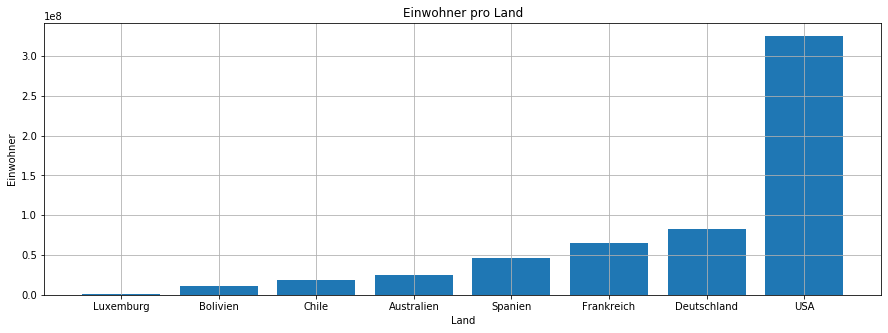

In [90]:
# Erstelle einen Plot der Größe 15*5 Zoll
plt.figure(figsize=(15,5))
# Erstelle ein Balkendiagramm für die Einwohner pro Land
# Sortiert nach Einwohnerzahl
df_sorted = df.sort_values(by='Einwohner')
plt.bar(df_sorted.Land, df_sorted.Einwohner)

plt.grid()
plt.xlabel('Land')
plt.ylabel('Einwohner')
plt.title('Einwohner pro Land')
plt.show()

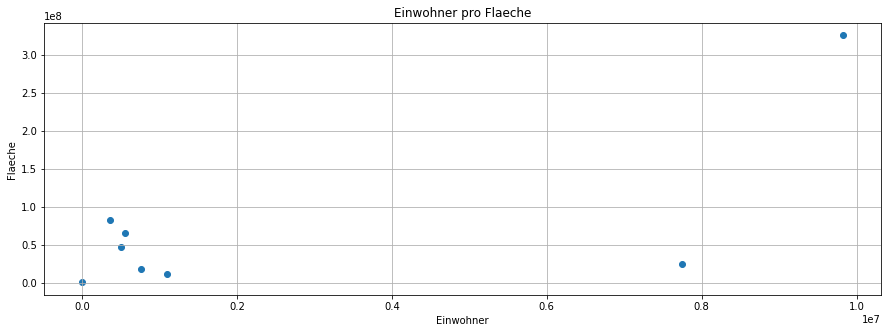

In [91]:
# Erstelle einen Plot der Größe 15*5 Zoll
plt.figure(figsize=(15,5))
# Erstelle einen Plot für Einwohner vs. Fläche
plt.scatter(df3.Flaeche, df3.Einwohner)

plt.grid()
plt.xlabel('Einwohner')
plt.ylabel('Flaeche')
plt.title('Einwohner pro Flaeche')
plt.show()

### Speichern und Laden von Daten

#### 1. Speichern von Daten

Wenn wir einen *DataFrame* erstellt haben wollen wir diesen oft für zukünftige Verwendungen speichern. Hierfür bietet sich das *.csv* Format an, da es plattformunabhängig ist und von vielen verschiedenen Programmen (bswp Excel) gelesen werden kann.

In [97]:
# Speichern als laender.csv
# Es kann auch das Argument sep verwendet werden um anzugeben wie die Werte separiert werden sollen
# Standard ist das Komma, aber es gibt auch das Leerzeichen df.to_csv('laender.csv', sep=' ')
# oder den Tabulator df.to_csv('laender.csv', sep='\t')
df3.to_csv('laender.csv', index=False)

#### 2. Laden von Daten

Wir können verschiedene Datenformate laden aber beschränken uns hier auf *.csv* Dateien. Wie beim Speichern kann auch beim Laden der Daten ein Separator (sep) angegeben werden. 

In [98]:
df4 = pd.read_csv('laender.csv')
df4

,Land,Hauptstadt,Einwohner,Flaeche,Einwohner pro Quadratkilomenter
0,USA,Washington,325400000,9826675,33.113947
1,Frankreich,Paris,65000000,551500,117.860381
2,Deutschland,Berlin,83100000,357121,232.694241
3,Spanien,Madrid,46600000,505370,92.209668
4,Australien,Canberra,24500000,7741220,3.164876
5,Luxemburg,Luxemburg (Stadt),600000,2586,232.018561
6,Bolivien,Sucre,11100000,1098581,10.103943
7,Chile,Santiago de Chile,18400000,756102,24.335341
